青汁
酵素
酢・黒酢
グルコサミン
プラセンタ
コラーゲン・ヒアルロン酸
乳酸菌（便秘関連）
にんにく
消臭
お茶
その他健康食品
精力剤・精力サプリ
葉酸・妊活
ダイエットサプリ
DHA・EPA
オルニチン・しじみ
キッズサプリ
筋肉サプリ・プロテイン

被引用すうもスクレイピングしてインパクトファクターを計算する。

テキストマイニングではエビデンスに基づくであろうワードを集計
政府の機構の承認。
栄養機能食品
特別用途食品
特定保健用食品：消費者庁
ロハコ

[Scientific Journal Rankings](https://www.scimagojr.com/journalrank.php)で食品分野のジャーナルのインパクトファクターを調べた。



[メルカリのコード](https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling)を参考にデータ解析を行う。
メルカリの場合のdfは
name:str, condition:int,     category:str(3 categories), brand_name: str, price:float, shipping:0or1, description: str
今回のdfは
title:str,rank:int, url:str, search words(3 words):str, n_aff_url:int, n_journal_url:int, if_score:float, passage of html: str 
もしくは
search_words:str                                     n_aff_url:int, n_journal_url:int, if_score:float, passage of html: str 

In [17]:
# function definition.
# import nltk
# import string
# import re
# import numpy as np
# import pandas as pd
# import pickle
# #import lda

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

# from nltk.stem.porter import *
# from nltk.tokenize import word_tokenize, sent_tokenize
# from nltk.corpus import stopwords
# from sklearn.feature_extraction import stop_words

# from collections import Counter
# from wordcloud import WordCloud
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls
# %matplotlib inline

# import bokeh.plotting as bp
# from bokeh.models import HoverTool, BoxSelectTool
# from bokeh.models import ColumnDataSource
# from bokeh.plotting import figure, show, output_notebook
# #from bokeh.transform import factor_cmap

# import warnings
# warnings.filterwarnings('ignore')
# import logging
# logging.getLogger("lda").setLevel(logging.WARNING)
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import pickle
# from google.colab import files

In [24]:

# google adsense: <script async src="//pagead2.googlesyndication.com/pagead/js/adsby.google.js"></script>
# media net: <script src="//contextual.media.net/nmedianet.js?cid="></script>
# bidvertiser: <SCRIPT data-cfasync="false" SRC="//bdv.bidvertiser.com"
# <script src="http://scripts.chitika.net/">
# <script data-cfasync="false" type='text/javascript' src="//p100124.clksite.com"


jp_aff_list = ["https://px.a8.net/", "https://track.affiliate-b.com/", "ck.jp.ap.valuecommerce.com/", \
               "http://h.accesstrade.net", "https://j-a-net.jp/", "https://hb.afl.rakuten.co.jp", \
              "https://click.linksynergy.com", "https://www.amazon.co.jp", "googleads.g.doubleclick.net", \
              "af.moshimo.com"]

us_aff_list = ["https://www.amazon.com", "revcontent.com", "https://hb.afl.rakuten.com", \
               "www.googleadservices.com", "cat.jp.as.criteo.com"]

ncbi_link = "https://www.ncbi.nlm.nih.gov/"
journal_list = ["https://ci.nii.ac.jp", "elsevier.com"]

def get_search_results_df(keyword):
  columns = ['rank','title','url', 'affiliate_url', 'paper_url']
  df = pd.DataFrame(columns=columns)
  html_doc = requests.get('https://www.google.com/search?num=10&q=' +keyword).text
  soup = BeautifulSoup(html_doc, 'html.parser') # BeautifulSoupの初期化
  tags = soup.find_all('h3',{'class':'r'})
  rank = 1
  for tag in tags:
    title = tag.text
    print (title)
    if "の画像検索結果" in title:
        print("this is a image.")
    else:    
        url = query_string_remove(tag.select("a")[0].get("href").replace("/url?q=",""))
        if ".pdf" in url:
            print("this is a pdf file")
        else:    
            affiliate_url =  get_a8_links(url) # 作成したコードの追加
            paper_url = get_paper_links(url)
            se = pd.Series([rank, title, url, affiliate_url, paper_url], columns)
            df = df.append(se, ignore_index=True)
            rank += 1
  return df
 
def query_string_remove(url):
 return url[:url.find('&')]


def get_a8_links(url):
 try:   
     html_doc = requests.get(url).text
     soup = BeautifulSoup(html_doc, 'html.parser') # BeautifulSoupの初期化
     tags = soup.select("a")
     urls = ""
     for tag in tags:
       try:
         url = tag.get("href")
         bool = any([True for x in jp_aff_list if url.find(x) > -1]) or any([True for x in us_aff_list if url.find(x) > -1])
         if bool:
           urls += url + "\n"
       except Exception as e:
         continue
     return urls
 except:
        print("error")

def get_paper_links(url):
 try:   
     html_doc = requests.get(url).text
     soup = BeautifulSoup(html_doc, 'html.parser') # BeautifulSoupの初期化
     tags = soup.select("a")
     urls = ""
     for tag in tags:
        bools = []
        scores = []   
        try:
            url = tag.get("href")
            # print(url)
            # bool = url.find(ncbi_link) > -1 or any([True for x in url_list if url.find(x) > -1]) # or any([True for x in df['journal_urls'] if url.find(x) > -1])

    #         for x, y in zip(df['simple_urls'], df['journal_scores']):
    #             bools = bools.append(url.find(x) > -1)
    #             scores = scores.append(y)
    #             print(bools)
    #         scores = scores[bools.index(True)]    
    #         scores = [scores[i] for i, x in enumerate(bools) if x == True]
            bool = any([False if x=='' else True if url.find(x) > -1 else False for x in df['simple_urls']]) \
                    or url.find(ncbi_link) > -1 or any([True for x in journal_list if url.find(x) > -1])
            # print(bool)
            if bool:
                urls += url + "\n"
        except Exception as e:
            continue
     return urls
 except:
        print("error")


In [25]:
# keywords
keyword = "kefir journal"
search_results_df = get_search_results_df(keyword)
search_results_df

Milk kefir: nutritional, microbiological and health benefits | Nutrition ...
The Microbiota and Health Promoting Characteristics of the ... - NCBI
Milk kefir: composition, microbial cultures, biological activities, and ...
Microbiological, technological and therapeutic properties of kefir: a ...
Short communication: Sensory analysis of a kefir product designed ...
Biotechnological innovations in kefir production: a ... - Emerald Insight
Biotechnological innovations in kefir production: a ... - Emerald Insight
(PDF) Journal Dairy Research kefir 2011 - ResearchGate
Properties and benefits of kefir -A review
this is a pdf file
Inhibitory Activity of Cheese Whey Fermented with Kefir Grains ...


,rank,title,url,affiliate_url,paper_url
0,1,"Milk kefir: nutritional, microbiological and h...",https://www.cambridge.org/core/journals/nutrit...,,https://www.cambridge.org/about-us/legal-notic...
1,2,The Microbiota and Health Promoting Characteri...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,,
2,3,"Milk kefir: composition, microbial cultures, b...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,,
3,4,"Microbiological, technological and therapeutic...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,,
4,5,Short communication: Sensory analysis of a kef...,https://www.journalofdairyscience.org/article/...,,https://www.elsevier.com/journals/journal-of-d...
5,6,Biotechnological innovations in kefir producti...,https://www.emeraldinsight.com/doi/abs/10.1108...,,
6,7,Biotechnological innovations in kefir producti...,https://www.emeraldinsight.com/doi/full/10.110...,,
7,8,(PDF) Journal Dairy Research kefir 2011 - Rese...,https://www.researchgate.net/publication/25994...,,
8,9,Inhibitory Activity of Cheese Whey Fermented w...,https://jfoodprotection.org/doi/abs/10.4315/03...,,


In [9]:
search_results_df.to_csv('./search_df.csv')

In [11]:
# count the numbers of journal urls of pages.
n_journal_urls = 0
for x in range(len(search_results_df.index)):
    n_journal_urls += len(search_results_df.at[x,'paper_url'].split('\n'))-1
print(n_journal_urls)    

0


In [13]:
# colluct journal urls from SJR.
html_doc = requests.get('https://www.scimagojr.com/journalrank.php?area=1100&category=1106').text
soup = BeautifulSoup(html_doc, 'html.parser')
tags = soup.select("a")
url_list = []
journal_urls = []

# # introduction pages of each journals
# pages = [x.get("href") for x in tags if "journalsearch.php?q=" in x.get("href")]

# docs = [BeautifulSoup(requests.get("https://www.scimagojr.com/" + x).text, 'html.parser').select("a") for x in pages]
# docs

counter = 0

for i in [x.get("href") for x in tags if "journalsearch.php?q=" in x.get("href")]:
    doc = requests.get("https://www.scimagojr.com/" + i).text
    soup = BeautifulSoup(doc, 'html.parser')
    tags = soup.select("a")
    try:
        journal_url = [requests.get(x.get("href")).url for x in tags if x.string=="Homepage"]
        if journal_url==[]:
            journal_url = [""]
        journal_urls = journal_urls + journal_url
        print(counter)    
        print(journal_urls)
    except:
        journal_urls = journal_urls + journal_url
        print("connection error.")
        print(counter)    
        print(journal_urls)
    counter += 1

# print(journal_urls)    

0
['https://onlinelibrary.wiley.com/']
1
['https://onlinelibrary.wiley.com/', '']
2
['https://onlinelibrary.wiley.com/', '', 'https://www.elsevier.com/journals/trends-in-food-science-and-technology/0924-2244#description']
3
['https://onlinelibrary.wiley.com/', '', 'https://www.elsevier.com/journals/trends-in-food-science-and-technology/0924-2244#description', '']
4
['https://onlinelibrary.wiley.com/', '', 'https://www.elsevier.com/journals/trends-in-food-science-and-technology/0924-2244#description', '', 'https://www.elsevier.com/journals/food-hydrocolloids/0268-005X#description']
5
['https://onlinelibrary.wiley.com/', '', 'https://www.elsevier.com/journals/trends-in-food-science-and-technology/0924-2244#description', '', 'https://www.elsevier.com/journals/food-hydrocolloids/0268-005X#description', 'https://www.elsevier.com/journals/food-policy/0306-9192#description']
6
['https://onlinelibrary.wiley.com/', '', 'https://www.elsevier.com/journals/trends-in-food-science-and-technology/092

In [18]:
# save journal_urls to txt file
f = open('journal_urls.txt', 'wb')
pickle.dump(journal_urls, f)
f = open("./journal_urls.txt","rb")
journal_urls = pickle.load(f)

In [14]:
# make df of journal urls and impact factor scores.
html_doc = requests.get('https://www.scimagojr.com/journalrank.php?area=1100&category=1106').text
soup = BeautifulSoup(html_doc, 'html.parser')
journal_titles = [i.text for i in soup.find_all('a', title='view journal details')]
journal_scores = [i.text.split()[0] for i in soup.find_all('td', class_='orde')]

df = pd.DataFrame({'journal_titles': journal_titles, 'journal_urls': journal_urls, 'journal_scores': journal_scores})

# create 'simple_urls' column to find url from html files.
simple_urls = [x.split("/")[2] if not x == "" and not x.split("/")[2] == "www.elsevier.com" else "https://www.journals.elsevier.com/" + x.split("/")[4] if not x == "" else x for x in journal_urls]
# simple_urls = [x.split("/")[2] if not x == "" or not x.split("/")[2] == www.elsevier.com else x for x in journal_urls]
df['simple_urls'] = simple_urls

df

,journal_titles,journal_urls,journal_scores,simple_urls
0,Comprehensive Reviews in Food Science and Food...,https://onlinelibrary.wiley.com/,2.996,onlinelibrary.wiley.com
1,Annual Review of Food Science and Technology,,2.966,
2,Trends in Food Science and Technology,https://www.elsevier.com/journals/trends-in-fo...,2.344,https://www.journals.elsevier.com/trends-in-fo...
3,Advances in Nutrition,,2.196,
4,Food Hydrocolloids,https://www.elsevier.com/journals/food-hydroco...,1.991,https://www.journals.elsevier.com/food-hydroco...
5,Food Policy,https://www.elsevier.com/journals/food-policy/...,1.950,https://www.journals.elsevier.com/food-policy
6,Global Food Security,,1.809,
7,Food Chemistry,https://www.elsevier.com/journals/food-chemist...,1.793,https://www.journals.elsevier.com/food-chemistry
8,Applied and Environmental Microbiology,https://aem.asm.org/,1.684,aem.asm.org
9,Molecular Nutrition and Food Research,http://www3.interscience.wiley.com/journal/117...,1.666,www3.interscience.wiley.com


In [21]:
# save df
df.to_csv('./journal_urls_if_df.csv')


In [22]:
df1 = pd.read_csv('./journal_urls_if_df.csv')

,Unnamed: 0,journal_titles,journal_urls,journal_scores,simple_urls
0,0,Comprehensive Reviews in Food Science and Food...,https://onlinelibrary.wiley.com/,2.996,onlinelibrary.wiley.com
1,1,Annual Review of Food Science and Technology,NaN,2.966,NaN
2,2,Trends in Food Science and Technology,https://www.elsevier.com/journals/trends-in-fo...,2.344,https://www.journals.elsevier.com/trends-in-fo...
3,3,Advances in Nutrition,NaN,2.196,NaN
4,4,Food Hydrocolloids,https://www.elsevier.com/journals/food-hydroco...,1.991,https://www.journals.elsevier.com/food-hydroco...
5,5,Food Policy,https://www.elsevier.com/journals/food-policy/...,1.950,https://www.journals.elsevier.com/food-policy
6,6,Global Food Security,NaN,1.809,NaN
7,7,Food Chemistry,https://www.elsevier.com/journals/food-chemist...,1.793,https://www.journals.elsevier.com/food-chemistry
8,8,Applied and Environmental Microbiology,https://aem.asm.org/,1.684,aem.asm.org
9,9,Molecular Nutrition and Food Research,http://www3.interscience.wiley.com/journal/117...,1.666,www3.interscience.wiley.com


In [15]:
# collect words of foods in English and Japanese.
html_doc = requests.get('https://www.eigo-love.jp/english-word-list-food/').text
soup = BeautifulSoup(html_doc, 'html.parser')

en_words = [i.string for i in soup.find_all('td', class_='column-1')]
jp_words = [i.string for i in soup.find_all('td', class_='column-2')]

columns = ['englih_words', 'japanese_wprds']
df_words = pd.DataFrame(jp_words,en_words).reset_index()
df_words.columns = columns


In [16]:
keyword = "fermentation health food"
search_results_df = get_search_results_df(keyword)
search_results_df

Fermented Foods: Top 15 Fermented Foods & Their Benefits - Dr. Axe
Japanese Fermented Foods: 6 Great Staples of a Healthy Diet | Let's ...
Koji: Fermentation is Foundational | Food Culture | Metropolis ...
Fermented foods for better gut health - Harvard Health Blog ...
Health Food｜Product｜Manda Fermentation Co., Ltd. - 万田発酵
Food Fermentation: Benefits, Safety, Food List, and More - Healthline
Manda Fermentation Co., Ltd.｜For the health and wellness of ...
fermentation health food の画像検索結果
this is a image.
The Health Benefits of Fermented Foods - YouTube
Health benefits of fermented foods. - NCBI
Fermentation + Immune Health — The Gut Coach | Cynthia Farris


,rank,title,url,affiliate_url,paper_url
0,1,Fermented Foods: Top 15 Fermented Foods & Thei...,https://draxe.com/fermented-foods/,,https://www.ncbi.nlm.nih.gov/pubmed/28945458\n...
1,2,Japanese Fermented Foods: 6 Great Staples of a...,https://gurunavi.com/en/japanfoodie/2016/12/ja...,,
2,3,Koji: Fermentation is Foundational | Food Cult...,https://metropolisjapan.com/fermented-food/,,
3,4,Fermented foods for better gut health - Harvar...,https://www.health.harvard.edu/blog/fermented-...,https://www.amazon.com/Always-Delicious-Satisf...,
4,5,"Health Food｜Product｜Manda Fermentation Co., Lt...",https://www.manda.co.jp/en/products/health/,,
5,6,"Food Fermentation: Benefits, Safety, Food List...",https://www.healthline.com/nutrition/fermentation,,https://www.ncbi.nlm.nih.gov/pubmed/22529959\n...
6,7,"Manda Fermentation Co., Ltd.｜For the health an...",https://www.manda.co.jp/en/,,
7,8,The Health Benefits of Fermented Foods - YouTube,https://www.youtube.com/watch%3Fv%3DvkeHALunHWI,,
8,9,Health benefits of fermented foods. - NCBI,https://www.ncbi.nlm.nih.gov/pubmed/28945458,,https://www.ncbi.nlm.nih.gov/guide/literature/\n
9,10,Fermentation + Immune Health — The Gut Coach |...,http://www.cynthiafarris.com/fermentation-the-...,,


In [ ]:
english_keywords = []
japanese_keywords = []
en_n_journals = []
jp_n_journals = []

english_keywords = [x + " health" for x in en_words]
japanese_keywords = [x + "　健康" for x in jp_words]


for i, j in zip(en_words, jp_words):
    english_keyword = i + " health"
    search_results_df = get_search_results_df(english_keyword)
    en_n_journal = sum([len(x.split('\n'))-1 if not x==None else 0 for x in search_results_df['paper_url']])
    en_n_journals.append(en_n_journal)
    
    japanese_keyword = j + " 健康"
    search_results_df = get_search_results_df(japanese_keyword)
    jp_n_journal = sum([len(x.split('\n'))-1 if not x==None else 0 for x in search_results_df['paper_url']])
    jp_n_journals.append(jp_n_journal)
    
    print(english_keyword, en_n_journal, japanese_keyword, jp_n_journal)
    print(en_n_journals, jp_n_journals)    
    
keywords_n_journals_df = pd.DataFrame({'english_keyword': english_keywords, 'en_n_journals': en_n_journals, \
                                       'japanese_keyword': japanese_keywords, 'jp_n_journals': jp_n_journals})


In [6]:
keywords_n_journals_df

NameError: name 'keywords_n_journals_df' is not defined

In [279]:
keywords_n_journals_df.en_n_journals.describe()

count    314.000000
mean      32.630573
std       39.575186
min        0.000000
25%        0.000000
50%       11.000000
75%       59.750000
max      156.000000
Name: en_n_journals, dtype: float64

In [280]:
keywords_n_journals_df.jp_n_journals.describe()

count    314.000000
mean       0.171975
std        1.239284
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       13.000000
Name: jp_n_journals, dtype: float64

Text(0.5, 1.0, 'Distribution of number of journals of English pages')

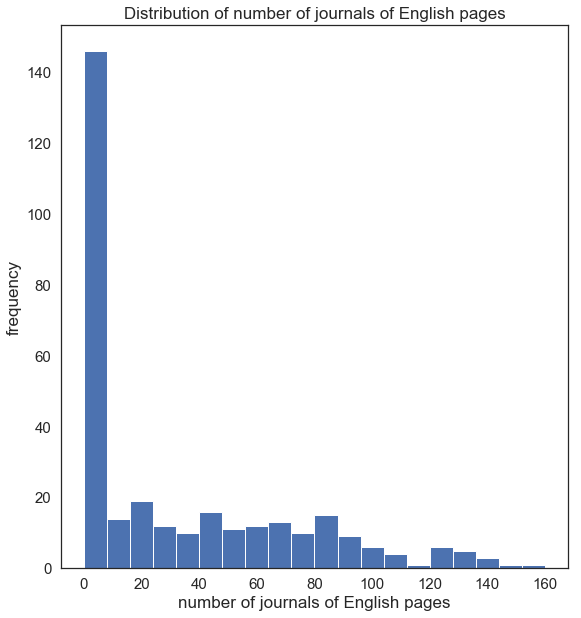

In [286]:
plt.subplot(1, 2, 1)
(keywords_n_journals_df.en_n_journals).plot.hist(bins=20, figsize=(20,10), edgecolor='white',range=[0,160])
plt.xlabel('number of journals of English pages', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Distribution of number of journals of English pages', fontsize=17)

Text(0.5, 1.0, 'Distribution of number of journals of Japanese pages')

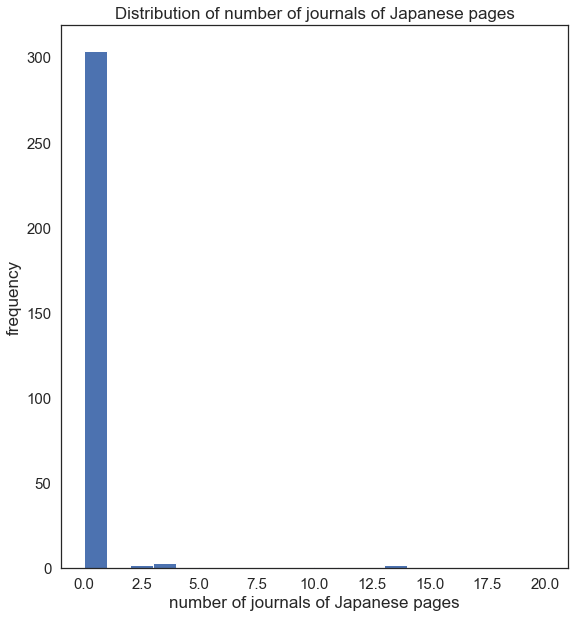

In [288]:
plt.subplot(1, 2, 1)
(keywords_n_journals_df.jp_n_journals).plot.hist(bins=20, figsize=(20,10), edgecolor='white',range=[0,20])
plt.xlabel('number of journals of Japanese pages', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Distribution of number of journals of Japanese pages', fontsize=17)

NameError: name 'keywords_n_journals_df' is not defined

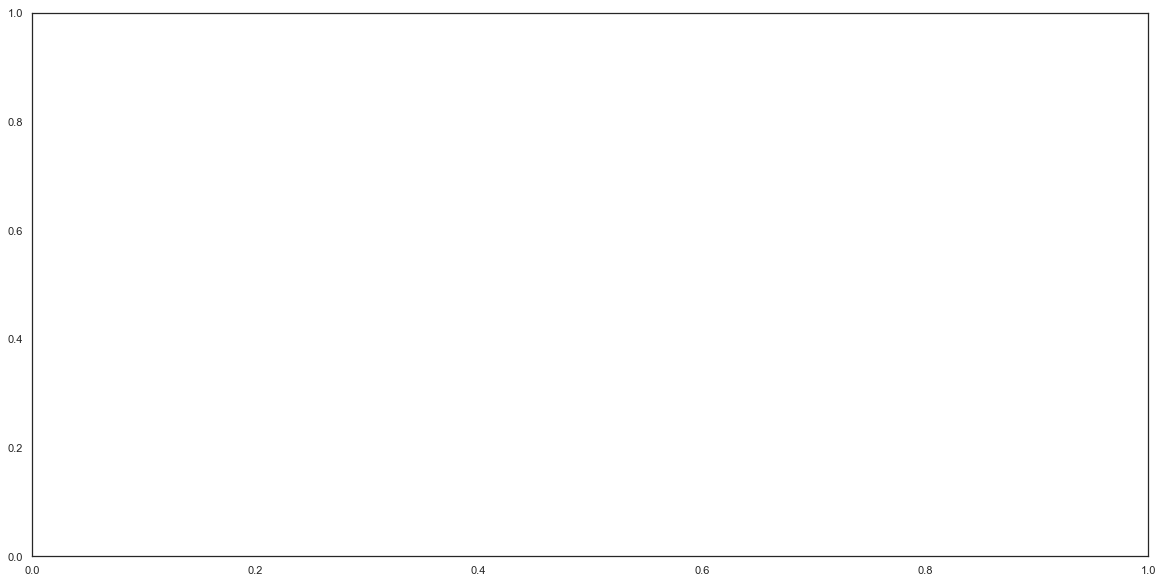

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(keywords_n_journals_df.jp_n_journals, color='#8CB4E1', alpha=0, bins=50,
       label='Price when Seller pays Shipping')
ax.hist(keywords_n_journals_df.en_n_journals, color='#007D00', alpha=0.7, bins=50,
       label='Price when Buyer pays Shipping')
ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
plt.xlabel('log(price+1)', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.title('Price Distribution by Shipping Type', fontsize=17)
plt.tick_params(labelsize=15)
plt.show()

,englih_words,japanese_wprds
0,alcohol,アルコール飲料
1,apple juice,リンゴジュース
2,beer,ビール
3,cocoa,ココア
4,coffee,コーヒー
5,cola,コーラ
6,drink,飲み物、飲料
7,fruit juice,果汁飲料
8,green tea,緑茶
9,iced coffee,アイスコーヒー


In [28]:
search_results_df

,rank,title,url,affiliate_url,paper_url
0,1,"Milk kefir: nutritional, microbiological and h...",https://www.cambridge.org/core/journals/nutrit...,,https://www.cambridge.org/about-us/legal-notic...
1,2,The Microbiota and Health Promoting Characteri...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,,
2,3,"Milk kefir: composition, microbial cultures, b...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,,
3,4,"Microbiological, technological and therapeutic...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,,
4,5,Short communication: Sensory analysis of a kef...,https://www.journalofdairyscience.org/article/...,,https://www.elsevier.com/journals/journal-of-d...
5,6,Biotechnological innovations in kefir producti...,https://www.emeraldinsight.com/doi/abs/10.1108...,,
6,7,Biotechnological innovations in kefir producti...,https://www.emeraldinsight.com/doi/full/10.110...,,
7,8,(PDF) Journal Dairy Research kefir 2011 - Rese...,https://www.researchgate.net/publication/25994...,,
8,9,Inhibitory Activity of Cheese Whey Fermented w...,https://jfoodprotection.org/doi/abs/10.4315/03...,,
